# 利用$\;Python\;$寫出可以計算矩陣的$LU$分解，矩陣的行列式以及求出線性方程組解(限二、三維)的程式

## 前情提要，請點下面的連結

## 在上面筆記中的程式碼我皆有在此測試過，只是當時僅用手寫的方式記錄下來。接下來，我要紀錄我實作的部分，我會先寫下教授的程式碼，以及我第一、二次修改的程式碼，以幾個矩陣分別測試我和教授的程式碼的計算結果，並進行比較。

## 1. $LU$分解法

### (1)教授寫的程式碼(有的註解是我自己加的，方便我記錄及理解)

[曾正男教授的LU分解教學影片連結](https://www.youtube.com/watch?v=W1elv5pS9xg)

In [163]:
import numpy as np

In [164]:
def LU_1(A):
    m, n = A.shape # array.shape 可以看array的形狀 ; m-->rows ; n-->columns
    U = A.copy()
    L = np.mat(np.identity(m)) # L最初的型態為單位矩陣
    P = L.copy()
    
    for i in range(m):
        
        maxEc = abs(U[i, i])
        maxRow = i
        for k in range(i+1, m):
            if abs(U[k, i]) > maxEc:
                maxEc = U[k, i]
                maxRow = k
        # swap maximum row with current row
        # [rows, columns] ; 第 i 列與第 maxRow 列互換 , 從該列的第 i 行開始(省略前面從第 0 行到第 (i-1)行的互換 ∵ 都是 0, 不用互換)
        U[[i, maxRow], i:] = U[[maxRow, i], i:]
        # [rows, columns] ; L矩陣要整行都互換, 而 P矩陣也要整列都互換
        L[[i, maxRow], :] = L[[maxRow, i], :]
        P[:, [i, maxRow]] = P[:, [maxRow, i]]
        
        # gauss elimination 
        for t in range(i+1, m):
            c = -float(U[t, i])/U[i, i] # U[i, i]--> U矩陣對角線上的數值
            # delete row t by i
            U[t, i:] = U[t, i:] + c*U[i, i:] # 列運算
            # delete column i by t
            L[t:, i] = L[t:, i] - c*L[t:, t] # 行運算
    return L, U, P

### (2)我第一次修改後的程式碼

In [165]:
import numpy as np

In [166]:
def LU_2(A):
    m, n = A.shape
    U = np.array(A.copy())
    L = np.mat(np.identity(m))
    P = L.copy()
    
    for i in range(m):
         for t in range(i, m-1): # from the first row to (the second to last), from the second row to (the second to last)...... 
            for h in range(t+1, m): # from the second row to the last, from the third row to the last......
                U = np.mat(U)
                if U[t, i] == 0:
                    continue
                else:
                    c = -(U[h ,i] / U[t, i])
                    U[h, :] = U[h, :] + c * U[t,:]
                    L[:, t] = L[:, t] - c * L[:, h]
                
                   
    
   
         for k in range(i+1, m):
            changeRow = i
            U = np.array(U)
            nonzero = np.count_nonzero(U, axis = 1) # row
            if nonzero[k] > nonzero[i]:
                changeRow = k
                U = np.mat(U)
                U[[changeRow, i], :] = U[[i, changeRow], :]
                P[[changeRow, i], :] = P[[i, changeRow], :]
                L[[changeRow, i], :] = L[[i, changeRow], :]
                L[:, [changeRow, i]] = L[:, [i, changeRow]]
                
                
    
       
    U = np.mat(U)
    return L, U, P
       

### (3)我第二次修改後的程式碼

In [167]:
import numpy as np

In [168]:
def LU_3(A):
    m, n = A.shape
    U = A.copy()
    U = U.astype('float64')
    P = np.mat(np.identity(m))
    L = P.copy()
    
    for i in range(m-1):
        for x in range(i+1, m):
            if U[i, i] == 0:
                if U[x, i] != 0:
                    U[[x, i], i:] = U[[i, x], i:]
                    P[[x, i], :] = P[[i, x], :]
                    L[[x, i], :] = L[[i, x], :]
                    L[:, [x, i]] = L[:, [i, x]]
        
        for t in range(i+1, m):
            if U[i, i] == 0:
                continue
            c = -(U[t, i]/U[i, i])
            U[t, i:] = U[t, i:] + c*U[i, i:]
            L[t, i] = L[t, i] - c*L[t, t]
            
    return L, U, P

### 接下來我會分別以一個 $4$ x $5$ 的矩陣$A$和 $5$ x $4$ 的矩陣$B$ 測試三個(包含教授的)不同的 $LU$分解法的結果，並測試該次分解後是否可以滿足: $PA = LU$ 還有 $PB = LU$ 

In [169]:
A = np.mat([[4, 6, 2, 0, 1], 
            [0, 5, -2, -1, 2], 
            [12, 38, -2, 0, 3], 
            [0, 3, 4, 0, 4]])
print('A 矩陣:')
A

A 矩陣:


matrix([[ 4,  6,  2,  0,  1],
        [ 0,  5, -2, -1,  2],
        [12, 38, -2,  0,  3],
        [ 0,  3,  4,  0,  4]])

In [170]:
B = np.mat([[4, 6, 2, 0], 
            [0, 5, -2, -1], 
            [12, 38, -2, 0], 
            [0, 3, 4, 0], 
            [1, 2, 3, 4]])
print('B 矩陣:')
B

B 矩陣:


matrix([[ 4,  6,  2,  0],
        [ 0,  5, -2, -1],
        [12, 38, -2,  0],
        [ 0,  3,  4,  0],
        [ 1,  2,  3,  4]])

### 教授程式的計算結果

In [171]:
L, U, P = LU_1(A)
print('L矩陣:')
print(L)
print('\n')

print('U矩陣:')
print(U)
print('\n')

print('P矩陣:')
print(P)
print('\n')

print('PA =')
print(P*A)
print('\n')

print('LU =')
print(L*U)

L矩陣:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


U矩陣:
[[12 38 -2  0  3]
 [ 0  3  4  0  4]
 [ 0  0 10  0  8]
 [ 0  0  0 -1  2]]


P矩陣:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


PA =
[[12. 38. -2.  0.  3.]
 [ 0.  3.  4.  0.  4.]
 [ 4.  6.  2.  0.  1.]
 [ 0.  5. -2. -1.  2.]]


LU =
[[ 0.  0. 10.  0.  8.]
 [ 0.  0.  0. -1.  2.]
 [12. 38. -2.  0.  3.]
 [ 0.  3.  4.  0.  4.]]


In [172]:
L, U, P = LU_1(B)
print('L矩陣:')
print(L)
print('\n')

print('U矩陣:')
print(U)
print('\n')

print('P矩陣:')
print(P)
print('\n')

print('PB =')
print(P*B)
print('\n')

print('LU =')
print(L*U)

IndexError: index 4 is out of bounds for axis 1 with size 4

### 我第一次修改後的程式的計算結果

In [173]:
L, U, P = LU_2(A)
print('L矩陣:')
print(L)
print('\n')

print('U矩陣:')
print(U)
print('\n')

print('P矩陣:')
print(P)
print('\n')

print('PA =')
print(P*A)
print('\n')

print('LU =')
print(L*U)

L矩陣:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [3.  4.  1.  0. ]
 [0.  0.6 0.  1. ]]


U矩陣:
[[ 4  6  2  0  1]
 [ 0  5 -2 -1  2]
 [ 0  0  0  4 -8]
 [ 0  0  5  0  2]]


P矩陣:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


PA =
[[ 4.  6.  2.  0.  1.]
 [ 0.  5. -2. -1.  2.]
 [12. 38. -2.  0.  3.]
 [ 0.  3.  4.  0.  4.]]


LU =
[[ 4.   6.   2.   0.   1. ]
 [ 0.   5.  -2.  -1.   2. ]
 [12.  38.  -2.   0.   3. ]
 [ 0.   3.   3.8 -0.6  3.2]]


In [174]:
L, U, P = LU_2(B)
print('L矩陣:')
print(L)
print('\n')

print('U矩陣:')
print(U)
print('\n')

print('P矩陣:')
print(P)
print('\n')

print('PB =')
print(P*B)
print('\n')

print('LU =')
print(L*U)

L矩陣:
[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [3.   4.   1.   0.   0.  ]
 [0.   0.6  0.   1.   0.  ]
 [0.25 0.   0.   0.4  1.  ]]


U矩陣:
[[ 4  6  2  0]
 [ 0  5 -2 -1]
 [ 0  0  0  4]
 [ 0  0  5  0]
 [ 0  0  0  4]]


P矩陣:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


PB =
[[ 4.  6.  2.  0.]
 [ 0.  5. -2. -1.]
 [12. 38. -2.  0.]
 [ 0.  3.  4.  0.]
 [ 1.  2.  3.  4.]]


LU =
[[ 4.   6.   2.   0. ]
 [ 0.   5.  -2.  -1. ]
 [12.  38.  -2.   0. ]
 [ 0.   3.   3.8 -0.6]
 [ 1.   1.5  2.5  4. ]]


### 我第二次修改後的程式的計算結果

In [175]:
L, U, P = LU_3(A)
print('L矩陣:')
print(L)
print('\n')

print('U矩陣:')
print(U)
print('\n')

print('P矩陣:')
print(P)
print('\n')

print('PA =')
print(P*A)
print('\n')

print('LU =')
print(L*U)

L矩陣:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.6 1.  0. ]
 [3.  4.  0.  1. ]]


U矩陣:
[[ 4.   6.   2.   0.   1. ]
 [ 0.   5.  -2.  -1.   2. ]
 [ 0.   0.   5.2  0.6  2.8]
 [ 0.   0.   0.   4.  -8. ]]


P矩陣:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


PA =
[[ 4.  6.  2.  0.  1.]
 [ 0.  5. -2. -1.  2.]
 [ 0.  3.  4.  0.  4.]
 [12. 38. -2.  0.  3.]]


LU =
[[ 4.  6.  2.  0.  1.]
 [ 0.  5. -2. -1.  2.]
 [ 0.  3.  4.  0.  4.]
 [12. 38. -2.  0.  3.]]


In [176]:
L, U, P = LU_3(B)
print('L矩陣:')
print(L)
print('\n')

print('U矩陣:')
print(U)
print('\n')

print('P矩陣:')
print(P)
print('\n')

print('PB =')
print(P*B)
print('\n')

print('LU =')
print(L*U)

L矩陣:
[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.6        1.         0.         0.        ]
 [3.         4.         0.         1.         0.        ]
 [0.25       0.1        0.51923077 0.94711538 1.        ]]


U矩陣:
[[ 4.   6.   2.   0. ]
 [ 0.   5.  -2.  -1. ]
 [ 0.   0.   5.2  0.6]
 [ 0.   0.   0.   4. ]
 [ 0.   0.   0.   0. ]]


P矩陣:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


PB =
[[ 4.  6.  2.  0.]
 [ 0.  5. -2. -1.]
 [ 0.  3.  4.  0.]
 [12. 38. -2.  0.]
 [ 1.  2.  3.  4.]]


LU =
[[ 4.  6.  2.  0.]
 [ 0.  5. -2. -1.]
 [ 0.  3.  4.  0.]
 [12. 38. -2.  0.]
 [ 1.  2.  3.  4.]]


### 由上可以發現，「只有」我第二次修該後的程式碼，其計算後的結果符合 $PA = LU$ 這個等式且$L$矩陣和$U$矩陣符合原則，，沒有編譯錯誤，計算也正確，教授的程式碼沒辦法處理某些特定情況的矩陣(我在筆記中有詳細說明)。
### 註記:我在後面寫求行列式的程式時找到了一個更好、更準確也更完整的$LU$分解法，詳見後面的2.求行列式

### 下面附上我在網路上的矩陣計算器計算出來的結果截圖

### $A$矩陣$LU$分解的計算結果

[![image1](https://www.linkpicture.com/q/61b9eba42dd17.png)](https://www.linkpicture.com/view.php?img=LPic61baa39a169b824069399)

### $B$矩陣$LU$分解的計算結果

[![image2](https://www.linkpicture.com/q/61b9ebc0aded8.png)](https://www.linkpicture.com/view.php?img=LPic61baa417c43091198458380)

## 2.求行列式
### 此前我在手寫筆記的心得中寫到$LU$分解後可以用來計算高階矩陣的行列式，但我沒有考慮到那是在$P$矩陣是單位矩陣的情況下才必定成立的結果(就是 $det(A) = \prod_{i = 0}^nU_{(i, i)}, where\;A\;is$ $a\;nxn\;matrix$)。在$P$矩陣有進行列對調的情況下，有可能出現$det(P) = -1$的情況，使式子變成$det(A) = -\prod_{i = 0}^nU_{(i, i)}, where\;A\;is$ $a\;nxn\;matrix$。所以$A$的行列式應該以
$$ A\;is\;a\;nxn\;matrix,\;det(A)= \begin{cases} \prod_{i = 0}^nU_{(i, i)}\;, & \text {if$\;det(P)=1$} \\ -\prod_{i = 0}^nU_{(i, i)}, & \text{if$\;det(P)=-1$} \end{cases} $$   
### 來表示。這一點我在寫心得的時候沒有注意到，我在這裡說明清楚。下面判斷$P$矩陣的行列式為$1$還是$-1$時，我利用行列式的基本性質:「兩行(列)對調後，行列式的數值變號」。因此，只要$P$矩陣列對調的次數為$2$的倍數，$P$矩陣的行列式就是$1$，否則就是$-1$($∵$$P$矩陣的初始設定為單位矩陣，單位矩陣的行列式必為$1$)。

### (1)利用$LU$分解法:接下來我以一個 $4$ x $4$ 的矩陣 $A\;$($A$的$P$矩陣的行列式為$1$)$\;$及一個 $5$ x $5$ 的矩陣 $B\;$($B$的$P$矩陣的行列式為$-1$)$\;$為例子，利用我寫的程式碼來計算它們的行列式。

In [177]:
import numpy as np
import sympy as sp

In [178]:
def det_LU(A):
    # LU Decomposition
    m, n = A.shape
    U = A.copy()
    U = U.astype('float64')
    P = np.mat(np.identity(m))
    L = P.copy()
    count = 0
    
    for i in range(m-1):
        for x in range(i+1, m):
            if U[i, i] == 0:
                if U[x, i] != 0:
                    U[[x, i], i:] = U[[i, x], i:]
                    P[[x, i], :] = P[[i, x], :]
                    L[[x, i], :] = L[[i, x], :]
                    L[:, [x, i]] = L[:, [i, x]]
                    count = count + 1
        
        for t in range(i+1, m):
            if U[i, i] == 0:
                continue
            c = -(U[t, i]/U[i, i])
            U[t, i:] = U[t, i:] + c*U[i, i:]
            L[t, i] = L[t, i] - c*L[t, t] 

                
    det_U = 1
    for j in range(m):
        det_U = det_U * U[j, j]
        
    # check count is an even or odd to ascertain its determinant(1 or -1)
    if count % 2 == 1:
        det_P = -1
    else:
        det_P = 1
    
    # check whether det_U is going to multiply (-1) or not
    if det_P == -1:
        det_U = (-1)*det_U
    
    return det_P, det_U, L, U, P

In [179]:
A = np.mat([[1, 3, 4, 5], 
            [0, -11, 33, 7], 
            [81, 15, -15, 2], 
            [34, 1, 10, 2]])
print('A矩陣:')
A

A矩陣:


matrix([[  1,   3,   4,   5],
        [  0, -11,  33,   7],
        [ 81,  15, -15,   2],
        [ 34,   1,  10,   2]])

In [180]:
det_P, det_U, L, U, P = det_LU(A)

In [181]:
print('A矩陣的P矩陣的行列式:')
det_P

A矩陣的P矩陣的行列式:


1

In [182]:
print('A矩陣的行列式為')
det_U

A矩陣的行列式為


-27323.999999999454

In [183]:
B = np.mat([[0, -11, 33, 7, 13], 
            [1, 3, 4, 5, 8], 
            [81, 15, -15, 2, 4], 
            [34, 1, 10, 2, 5], 
            [-10, 4, 88, 9, 0]])
print('B矩陣:')
B

B矩陣:


matrix([[  0, -11,  33,   7,  13],
        [  1,   3,   4,   5,   8],
        [ 81,  15, -15,   2,   4],
        [ 34,   1,  10,   2,   5],
        [-10,   4,  88,   9,   0]])

In [184]:
det_P, det_U, L, U, P = det_LU(B)

In [185]:
print('B矩陣的P矩陣的行列式:')
det_P

B矩陣的P矩陣的行列式:


-1

In [186]:
print('B矩陣的行列式為')
det_U

B矩陣的行列式為


-745137.9999999763

### 然而，在我用網路上的矩陣計算器確認我的行列式是否正確時(下面附上在網站上的矩陣計算器的計算結果截圖)，我發現$Python\;$在計算上可能因為涉及到無限循環小數而造成數值上的誤差，在這裡就是如此。而我在想，究竟我用我$LU$分解算出的行列式要「無條件捨去小數」、「無條件進位」、還是「四捨五入」呢?

### $A$矩陣的行列式

[![image3](https://www.linkpicture.com/q/6155234308ef7.jpg)](https://www.linkpicture.com/view.php?img=LPic61baa3d79fc9a410846949)

### $B$矩陣的行列式

[![image4](https://www.linkpicture.com/q/615d52e99f772.png)](https://www.linkpicture.com/view.php?img=LPic61baa44d244ba1432427979)

### 此時，我想起之前在網路上無意間看到同為政治大學的蔡炎龍教授在$\;youtube\;$發布的教學影片(下面附上連結)，內容主要是用$「sympy」$這個模組來進行矩陣的各種計算。與$「numpy」$不同的是，$「sympy」$在計算時不用特地把矩陣中元素的資料型態轉成$「float」$，它會以分數的形式來進行計算。這個設定幫了我一個大忙，如此一來，就可以避免在計算上涉及無限循環小數時產生的誤差，可以精準的算出該矩陣的行列式。

### 在這裡，我修改了一些地方。首先把$np.mat(...)$($np$指的是$「numpy」$，$...$放的是矩陣的名稱，後面的...也是)改成$sp.Matrix(...)$($sp$指的是$sympy$)外，$U = U.astype('float64')$這行不用寫了。$np.identity(...)$要改成$sp.Matrix(...)$，而$sp.Matrix(...)$沒有列對調或是行對調的功能，所以我在行(列)對調時，要先將$sp.Matrix$換成$np.mat$，列(行)對調完以後，再換回$sp.Matrix(...)$。此時，$sp.Matrix(...)$中的元素可能會是小數，而為了避免計算產生誤差，我用$sp.Rational(....)$ (....放的是矩陣內的元素)把$sp.Matrix(...)$中的元素全部換成分數，並在後面加上$.limit\_denominator( )$，確保分數是一個比較好看的分數(同時也降低小數轉換成分數的誤差)。

[蔡炎龍教授的教學影片連結-Sympy中的符號型的計算](https://www.youtube.com/watch?v=3PGQS6hzThc&t=221s)

[蔡炎龍教授的教學影片連結-Sympy中的矩陣](https://www.youtube.com/watch?v=NgdzGygs1NE&t=261s)

### (1)利用$LU$分解法(修改後的程式碼):

In [187]:
import numpy as np
import sympy as sp

In [188]:
def det_LU_sympy(A):
    # LU Decomposition
    m, n = A.shape
    U = A.copy()
    P = sp.eye(m)
    L = P.copy()
    count = 0
    
    for i in range(m-1):
        for x in range(i+1, m):
            if U[i, i] == 0:
                if U[x, i] != 0:
                    L = np.mat(L)
                    U = np.mat(U)
                    P = np.mat(P)
                    U[[x, i], i:] = U[[i, x], i:]
                    P[[x, i], :] = P[[i, x], :]
                    L[[x, i], :] = L[[i, x], :] # rpw interchange
                    L[:, [x, i]] = L[:, [i, x]] # column interchange
                    count = count + 1
                    L = sp.Matrix(L)
                    U = sp.Matrix(U)
                    P = sp.Matrix(P)
                    for g in range(m):
                        for h in range(m):
                            L[g, h] = sp.Rational(L[g, h]).limit_denominator()
                            U[g, h] = sp.Rational(U[g, h]).limit_denominator()
                    

        
        for t in range(i+1, m):
            if U[i, i] == 0:
                continue
            c = -(U[t, i]/U[i, i])
            U[t, i:] = U[t, i:] + c*U[i, i:]
            L[t, i] = L[t, i] - c*L[t, t]    
    det_U = 1
    for j in range(m):
        det_U = det_U * U[j, j]
        
    # check count is an even or odd to ascertain its determinant(1 or -1)
    if count % 2 == 1:
        det_P = -1
    else:
        det_P = 1
    
    # check whether det_U is going to multiply (-1) or not
    if det_P == -1:
        det_U = (-1)*det_U
    
    return det_P, det_U, L, U, P

In [189]:
A = sp.Matrix([[1, 3, 4, 5], 
               [0, -11, 33, 7], 
               [81, 15, -15, 2], 
               [34, 1, 10, 2]])
print('A矩陣:')
A

A矩陣:


Matrix([
[ 1,   3,   4, 5],
[ 0, -11,  33, 7],
[81,  15, -15, 2],
[34,   1,  10, 2]])

In [190]:
det_P, det_U, L, U, P = det_LU_sympy(A)

In [191]:
print('A矩陣的P矩陣的行列式:')
det_P

A矩陣的P矩陣的行列式:


1

In [192]:
print('A矩陣的行列式為')
det_U

A矩陣的行列式為


-27324

In [193]:
B = sp.Matrix([[0, -11, 33, 7, 13], 
               [1, 3, 4, 5, 8], 
               [81, 15, -15, 2, 4], 
               [34, 1, 10, 2, 5], 
               [-10, 4, 88, 9, 0]])
print('B矩陣:')
B

B矩陣:


Matrix([
[  0, -11,  33, 7, 13],
[  1,   3,   4, 5,  8],
[ 81,  15, -15, 2,  4],
[ 34,   1,  10, 2,  5],
[-10,   4,  88, 9,  0]])

In [194]:
det_P, det_U, L, U, P = det_LU_sympy(B)

In [195]:
print('B矩陣的P矩陣的行列式:')
det_P

B矩陣的P矩陣的行列式:


-1

In [196]:
print('B矩陣的行列式:')
det_U

B矩陣的行列式:


-745138

### 由上可以知道，用我修改後的程式碼可以算出準確的行列式(且不論$P$矩陣的行列式為$1$或$-1$)。而用這個程式碼算出來的$LU$分解也是正確的(程式的計算結果下面附上在網站上的矩陣計算器的計算結果截圖)

In [197]:
det_P, det_U, L, U, P = det_LU_sympy(A)

In [198]:
from IPython.display import display, Markdown, Latex

In [199]:
a = '### $'+'PA\;=LU→' + sp.latex(P) + sp.latex(A) + '=' + sp.latex(L) + sp.latex(U) + '$'
# print(a)
display(Markdown(a))

### $PA\;=LU→\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]\left[\begin{matrix}1 & 3 & 4 & 5\\0 & -11 & 33 & 7\\81 & 15 & -15 & 2\\34 & 1 & 10 & 2\end{matrix}\right]=\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\81 & \frac{228}{11} & 1 & 0\\34 & \frac{101}{11} & \frac{13}{31} & 1\end{matrix}\right]\left[\begin{matrix}1 & 3 & 4 & 5\\0 & -11 & 33 & 7\\0 & 0 & -1023 & - \frac{6029}{11}\\0 & 0 & 0 & - \frac{828}{341}\end{matrix}\right]$

### $A$矩陣的$LU$分解結果
### 註記:$A$矩陣的$P$矩陣為單位矩陣，所以這裡沒有顯示出來。

[![image5](https://www.linkpicture.com/q/615e65e7af288.png)](https://www.linkpicture.com/view.php?img=LPic61baa47504ce9219908038)

In [200]:
det_P, det_U, L, U, P = det_LU_sympy(B)

In [201]:
from IPython.display import display, Markdown, Latex

In [202]:
a = '### $'+'PB\;=LU→' + sp.latex(P) + sp.latex(B) + '=' + sp.latex(L) + sp.latex(U) + '$'
# print(a)
display(Markdown(a))

### $PB\;=LU→\left[\begin{matrix}0 & 1 & 0 & 0 & 0\\1 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 1\end{matrix}\right]\left[\begin{matrix}0 & -11 & 33 & 7 & 13\\1 & 3 & 4 & 5 & 8\\81 & 15 & -15 & 2 & 4\\34 & 1 & 10 & 2 & 5\\-10 & 4 & 88 & 9 & 0\end{matrix}\right]=\left[\begin{matrix}1 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0\\81 & \frac{228}{11} & 1 & 0 & 0\\34 & \frac{101}{11} & \frac{13}{31} & 1 & 0\\-10 & - \frac{34}{11} & - \frac{230}{1023} & \frac{479269}{27324} & 1\end{matrix}\right]\left[\begin{matrix}1 & 3 & 4 & 5 & 8\\0 & -11 & 33 & 7 & 13\\0 & 0 & -1023 & - \frac{6029}{11} & - \frac{10048}{11}\\0 & 0 & 0 & - \frac{828}{341} & - \frac{1126}{341}\\0 & 0 & 0 & 0 & - \frac{372569}{13662}\end{matrix}\right]$

### $B$矩陣的$LU$分解結果

[![image](https://www.linkpicture.com/q/61a72a546e647.png)](https://www.linkpicture.com/view.php?img=LPic61baa4c10a9591484895043)

### (2)利用特徵方程式:我知道行列式其實也可以運用$\;Cayley-Hamilton\;$定理寫出的特徵方程式，配合根與係數(特徵值全部相乘)來求出矩陣的行列式。不過，這個部分超出我的能力範圍，以我現在所學的還無法用$\;Python\;$寫出來，還有我這裡主要是討論$LU$分解，所以這部份我就從略。

## 3. 線性方程式求解

### (1)利用克拉瑪公式(求解&判斷解的情況)

### 承接上面的內容，利用$LU$分解，我得以快速且正確地求出高階矩陣的行列式，而不用將其一個個以餘因子降階展開整理。接著，我打算運用這個計算行列式的方法，結合克拉瑪公式，進而判斷該方程組的解的情況，即「恰有一解、無解、無限多組解」以及求出「恰有一解」的方程組之答案。

### 克拉瑪公式:$\begin{cases}x = \frac{△_x}{△} \\y = \frac{△_y}{△} \\z = \frac{△_z}{△}\end{cases} $

In [203]:
import sympy as sp
import numpy as np

In [204]:
def Cramer(A, b):
    m, n = A.shape
    # LU decomposition
    delta = A.copy()
    
    delta_x = sp.zeros(m, n)
    delta_x[:, :n] = A
    delta_x[:, 0] = b

    delta_y = sp.zeros(m, n)
    delta_y[:, :n] = A
    delta_y[:, 1] = b
    
    if m == 3:
        delta_z = sp.zeros(m, n)
        delta_z[:, :n] = A
        delta_z[:, 2] = b
    
    P1 = sp.eye(m)
    P2 = P1.copy()
    P3 = P2.copy()
    P4 = P3.copy()
    count_delta = 0
    count_delta_x = 0
    count_delta_y = 0
    count_delta_z = 0
    
    for i in range(m-1):
        for x in range(i+1, m):
            # delta
            if delta[i, i] == 0:
                if delta[x, i] != 0:
                    delta = np.mat(delta)
                    P1 = np.mat(P1)
                    delta[[x, i], i:] = delta[[i, x], i:]
                    P1[[x, i], :] = P1[[i, x], :]
                    count_delta = count_delta + 1
                    delta = sp.Matrix(delta)
                    P1 = sp.Matrix(P1)
                    
            # delta x 
            if delta_x[i, i] == 0:
                if delta_x[x, i] != 0:
                    delta_x = np.mat(delta_x)
                    P2 = np.mat(P2)
                    delta_x[[x, i], i:] = delta_x[[i, x], i:]
                    P2[[x, i], :] = P2[[i, x], :]
                    delta_x = sp.Matrix(delta_x)
                    P2 = sp.Matrix(P2)
                    
            # delta y
            if delta_y[i, i] == 0:
                if delta_y[x, i] != 0:
                    delta_y = np.mat(delta_y)
                    P3 = np.mat(P3)
                    delta_y[[x, i], i:] = delta_y[[i, x], i:]
                    P3[[x, i], :] = P3[[i, x], :]
                    delta_y = sp.Matrix(delta_y)
                    P3 = sp.Matrix(P3)
                    
            # delta z
            if m == 3:
                if delta_z[i, i] == 0:
                    if delta_z[x, i] != 0:
                        delta_z = np.mat(delta_z)
                        P4 = np.mat(P4)
                        delta_z[[x, i], i:] = delta_z[[i, x], i:]
                        P4[[x, i], :] = P4[[i, x], :]
                        delta_z = sp.Matrix(delta_z)
                        P4 = sp.Matrix(P4)
            
                    
        
        for t in range(i+1, m):
            # delta
            if delta[i, i] == 0:
                continue
            c = -(delta[t, i]/delta[i, i])
            delta[t, i:] = delta[t, i:] + c*delta[i, i:]
            
            # delta x
            if delta_x[i, i] == 0:
                continue
            c = -(delta_x[t, i]/delta_x[i, i])
            delta_x[t, i:] = delta_x[t, i:] + c*delta_x[i, i:]
            
            # delta y
            if delta_y[i, i] == 0:
                continue
            c = -(delta_y[t, i]/delta_y[i, i])
            delta_y[t, i:] = delta_y[t, i:] + c*delta_y[i, i:]
            
            # delta z
            if m == 3:
                if delta_z[i, i] == 0:
                    continue
                c = -(delta_z[t, i]/delta_z[i, i])
                delta_z[t, i:] = delta_z[t, i:] + c*delta_z[i, i:]


    # calculate Δ, Δx, Δy, Δz
    det_1 = 1 # Δ
    det_2 = 1 # Δx
    det_3 = 1 # Δy
    det_4 = 1 # Δz
    for j in range(m):
        det_1 = det_1 * delta[j, j]
        det_2 = det_2 * delta_x[j, j]
        det_3 = det_3 * delta_y[j, j]
        if m == 3:
            det_4 = det_4 * delta_z[j, j]    
    
    # check count is an even or odd to ascertain its determinant(1 or -1)
    # Δ
    if count_delta % 2 == 1:
        det_P1 = -1
        
    else:
        det_P1 = 1
        
    if det_P1 == -1:
        det_1 = (-1)*det_1

    # Δx
    if count_delta_x % 2 == 1:
        det_P2 = -1
        
    else:
        det_P2 = 1
        
    if det_P2 == -1:
        det_2 = (-1)*det_2
    
    # Δy
    if count_delta_y % 2 == 1:
        det_P3 = -1
        
    else:
        det_P3 = 1
        
    if det_P3 == -1:
        det_3 = (-1)*det_3
    
    # Δz
    if m == 3:
        if count_delta_z % 2 == 1:
            det_P4 = -1
        
        else:
            det_P4 = 1
        
        if det_P4 == -1:
            det_4 = (-1)*det_4
    

    
    
    # a unique solution(一組解)
    # △ ≠ 0
    if det_1 != 0: 
        state = '恰有一解'
        x = sp.zeros(3, 1)
        x[0, 0] = det_2 / det_1
        x[1, 0] = det_3 / det_1
        x[2, 0] = det_4 / det_1
    
    # no solution(無解)
    # △ = 0, one (or more) of △x and △y is(are) ≠ 0  [two-dimensional]
    # △ = 0, one (or more) of △x, △y and d△z is(are) ≠ 0  [three-dimensional]
    
    # no solution or infinitely many solutions(無解, 或是無限多組解)
    # △ = △x = △y = 0 → infinitely many solutions [two-dimensional]
    # △ = △x = △y = △z = 0 → no solution or infinitely many solutions [three-dimensional]    
    
    if m == 2 and det_1 == 0: # two-dimensional
        if det_2 != 0 or det_3 != 0:
            state = '無解'
            x = ''
        else:
            state = '無限多組解'
            x 
    
    if m == 3 and det_1 == 0:
        # △x, △y, △z是否至少其一不為 0 的判斷 
        if det_2 != 0 or det_3 != 0 or det_4 != 0: 
            state = '無解'
            x = ''
        else:
            n1 = A[0, :]
            n2 = A[1, :]
            n3 = A[2, :]

            s12 = n1.cross(n2)
            s23 = n2.cross(n3)
            s31 = n3.cross(n1)

            bool1 = s12.is_zero_matrix
            bool2 = s23.is_zero_matrix
            bool3 = s31.is_zero_matrix
    
            if not(bool1) and not(bool2) and not(bool3):
                state = '無限多組解'
                x = ''
    
            else:
                d1 = b[0, 0]
                d2 = b[1, 0]
                d3 = b[2, 0]
    
                for i in range(0, n-1):
                    if n1[0, i] == 0:
                        continue
        
                    else:
                        e1 = (1 / n1[0, i]) * d1
                        e2 = (1 / n2[0, i]) * d2
                        e3 = (1 / n3[0, i]) * d3
                        break
     
                if e1 == e2 and e2 == e3:
                    state = '無限多組解'
                    x = ''
    
                else:
                    state = '無解'
                    x = ''
  
    return state, x

### 在寫主程式碼之前，我已經在紙上徹底地將各個不同條件下($△≠0;\; △=△_x=△_y=△_z=0;\;△=0, (△_x, △_y, △_z)$至少其一不為$0$)下所有可能發生的三平面的狀況，以自問自答的方式，依序分析這些狀況是否符合原先的條件，要用什麼方法來進行完整地分類，尤其是$△=△_x=△_y=△_z=0$的條件下，可能會有「無解」或是「無限多組解」兩種結果，這部分我也有清楚地記錄下我的判斷依據及流程。以下連結的內容是我在學習「克拉瑪公式&三元線性方程組」的筆記，我以拍照的方式上傳到另一個jupyter notebook的檔案。另外，下面的圖片為我上方程式碼的完整流程圖。

### 註記:下面的流程圖不包含二元或是三元的的判斷

[![image](https://www.linkpicture.com/q/0001_76.jpg)](https://www.linkpicture.com/view.php?img=LPic61c3f0faa9917863633965)

###  接下來，我會以三種三元一次線性聯立方程組不同情況(恰有一解、無解，和無限多組解)個舉出一個例子，用我的程式碼來進行計算，其中，我會把該方程組以$Ax=b$的形式表示，而恰有一解中算出來的答案我會用$A$矩陣與解($x$矩陣)相乘，測試其結果是否會和$b$矩陣相同，即是否能滿足$Ax=b$的等式。另外，雖然我的程式中有進行二元與三元的判斷，但因為二元一次線性聯立方程組計算上及判斷解不會太複雜，而教授在教學影片中也只有提及三元的方程組，所以我這裡只舉出三元的三個情況作為例子。

### 1.恰有一解

In [205]:
from sympy.abc import x, y, z

In [206]:
a = sp.Matrix([[85, 69, -34], 
               [69, -85, 47], 
               [23, -200, -21]])
b = sp.Matrix([[x],
               [y], 
               [z]])
c = sp.Matrix([[120], 
               [10], 
               [-23]])

###   $\begin{cases}85x+69y-34z=120\\69x-85y+47z=10 \;\;\;--→\\23x-200y-21z=-23\end{cases} \; \left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

In [207]:
A = sp.Matrix([[85, 69, -34], 
               [69, -85, 47], 
               [23, -200, -21]])
A

Matrix([
[85,   69, -34],
[69,  -85,  47],
[23, -200, -21]])

In [208]:
b = sp.Matrix([[120], 
               [10], 
               [-23]])
b

Matrix([
[120],
[ 10],
[-23]])

### 我的程式碼計算的結果

In [209]:
state, x = Cramer(A, b)
print(state)
x

恰有一解


Matrix([
[1416571/1528025],
[ 439413/1528025],
[-959852/1528025]])

In [210]:
A*x

Matrix([
[120],
[ 10],
[-23]])

In [211]:
b

Matrix([
[120],
[ 10],
[-23]])

## $Ax=b →(valid)$

### 2.無解

In [212]:
from sympy.abc import x, y, z

In [213]:
a = sp.Matrix([[-4, 2, -1], 
               [3, 1, 3], 
               [2, 4, 5]])
b = sp.Matrix([[x], 
               [y], 
               [z]])
c = sp.Matrix([[-1], 
               [1], 
               [3]])

###   $\begin{cases}-4x+2y-z=-1\\3x+y+3z=1 \;\;\;\;\;-→\\2x+4y+5z=3\end{cases}  \left[\begin{matrix}-4 & 2 & -1\\3 & 1 & 3\\2 & 4 & 5\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}-1\\1\\3\end{matrix}\right]$

In [214]:
A = sp.Matrix([[-4, 2, -1], 
               [3, 1, 3], 
               [2, 4, 5]])
A

Matrix([
[-4, 2, -1],
[ 3, 1,  3],
[ 2, 4,  5]])

In [215]:
b = sp.Matrix([[-1], 
               [1], 
               [3]])
b

Matrix([
[-1],
[ 1],
[ 3]])

### 我的程式碼計算的結果

In [216]:
state, x = Cramer(A, b)
print(state)
x

無解


''

### 下面為了驗證無解的判斷是正確的，我在那兩個情況的最後面將該線性方程組的圖形畫出來，利用這些平面之間的交線情況來驗證我的判斷是否正確。

In [217]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format  = 'svg'

<IPython.core.display.Javascript object>


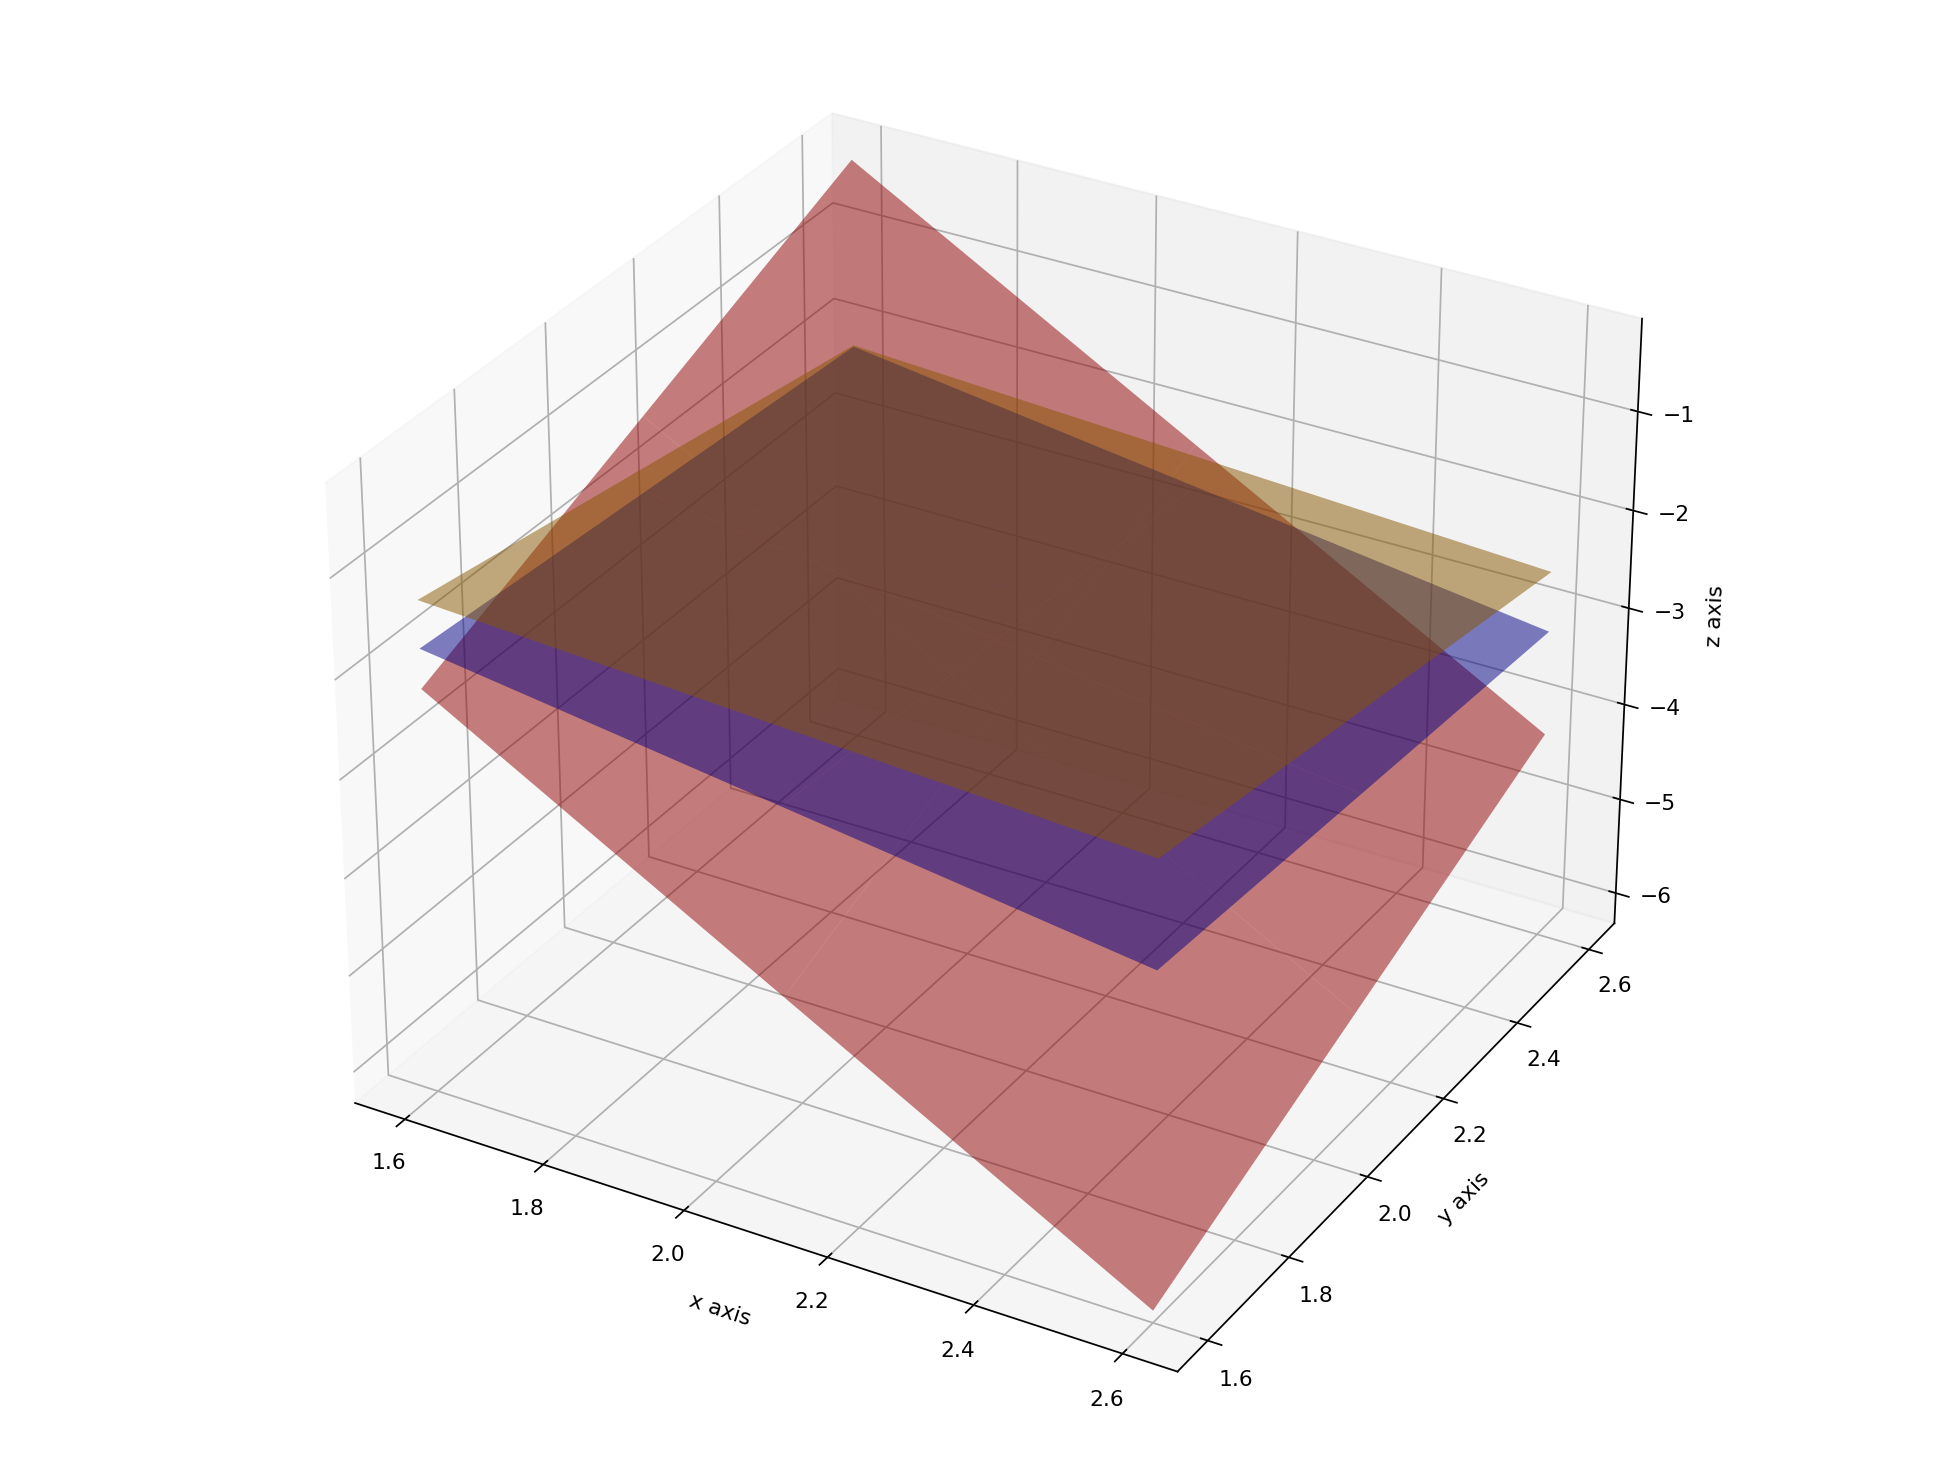

In [218]:
x = np.arange(1.6, 3, 0.5)
y = np.arange(1.6, 3, 0.5)
X, Y = np.meshgrid(x, y)
# print(np.meshgrid(x, y))
# print(type(X)) # array
Z1 = -4*X + 2*Y + 1
Z2 = (-3*X - Y + 1)/3
Z3 = (-2*X - 4*Y + 3)/5

fig = plt.figure()
ax1 = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax1)
ax1.plot_surface(X, Y, Z1, alpha = 0.5, color = 'red')
ax1.plot_surface(X, Y, Z2, alpha = 0.5, color = 'blue')
ax1.plot_surface(X, Y, Z3, alpha = 0.5, color = 'orange')
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

fig.set_figwidth(8) 
fig.set_figheight(6)

### 從圖形來看，此三平面兩兩交於一直線，且沒有共同交點，所以我的程式碼正確判斷出此線性方程組為無解是正確的。

### 3.無限多組解

In [219]:
from sympy.abc import x, y, z

In [220]:
a = sp.Matrix([[2, -1, -1], 
               [1, 1, 2], 
               [-7, 2, 1]])
b = sp.Matrix([[x], 
               [y], 
               [z]])
c = sp.Matrix([[1], 
               [2], 
               [-5]])

###   $\begin{cases}2x-y-z=1\\x+y+2z=2 \;\;\;\;\;\;\;-→\\-7x+2y+z=-5\end{cases}  \left[\begin{matrix}2 & -1 & -1\\1 & 1 & 2\\-7 & 2 & 1\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}1\\2\\-5\end{matrix}\right]$

In [221]:
A = sp.Matrix([[2, -1, -1], 
               [1, 1, 2], 
               [-7, 2, 1]])
A

Matrix([
[ 2, -1, -1],
[ 1,  1,  2],
[-7,  2,  1]])

In [222]:
b = sp.Matrix([[1], 
               [2], 
               [-5]])
b

Matrix([
[ 1],
[ 2],
[-5]])

### 我的程式碼計算的結果

In [223]:
state, x = Cramer(A, b)
print(state)
x

無限多組解


''

### 下面為了驗證無限多組解的判斷是正確的，我在那兩個情況的最後面將該線性方程組的圖形畫出來，利用這些平面之間的交線情況來驗證我的判斷是否正確。

In [224]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format  = 'svg'

<IPython.core.display.Javascript object>


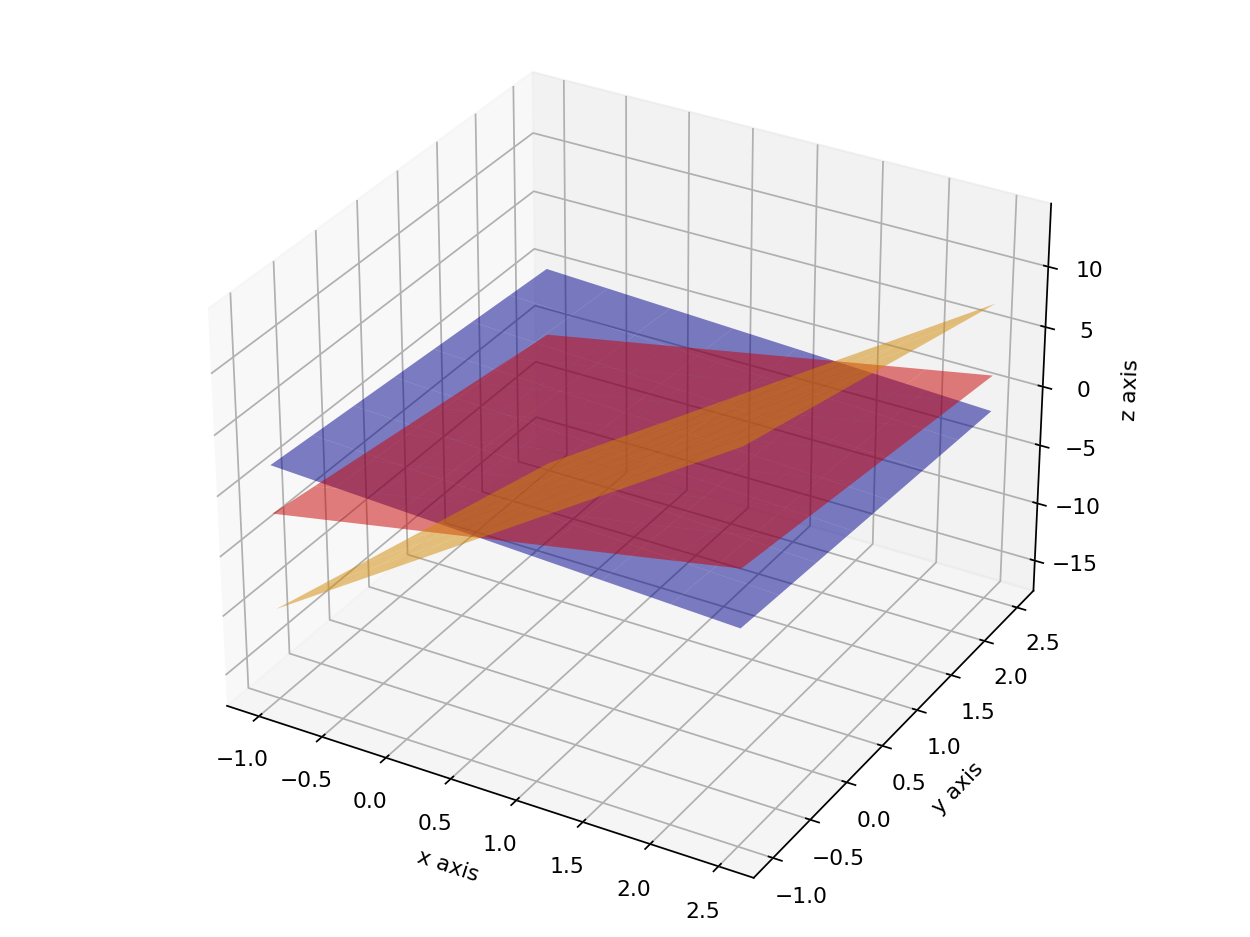

In [225]:
x = np.arange(-1, 3, 0.5)
y = np.arange(-1, 3, 0.5)
X, Y = np.meshgrid(x, y)
# print(np.meshgrid(x, y))
# print(type(X)) # array
Z1 = 2*X - Y -1
Z2 = (-X - Y + 2)/2
Z3 = 7*X - 2*Y - 5

fig = plt.figure()
ax1 = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax1)
ax1.plot_surface(X, Y, Z1, alpha = 0.5, color = 'red')
ax1.plot_surface(X, Y, Z2, alpha = 0.5, color = 'blue')
ax1.plot_surface(X, Y, Z3, alpha = 0.5, color = 'orange')
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

fig.set_figwidth(8) 
fig.set_figheight(6)

### 從圖形來看，此三平面共同交於一條直線，所以我的程式碼正確判斷出這個線性方程組為無線多組解是正確的。

## (2)高斯消去法

### 畢竟高斯消去法是$LU$分解重要的一環，而我又討論到線性方程組的求解，那就不能不提它了。其實在曾正男講解$LU$分解法前，他就有另外做了一個高斯消去法的教學影片，可見它的重要性。而教授同樣在影片最後面附上他所寫的程式碼，下面我同樣會對教授的程式碼進行修改。

### 我在先前測試的時候發現教授的程式碼有與$LU$分解的程式碼相似的問題，只要主對角線上很多$0$的時候就容易發生問題。其實教授也有提到，他寫的程式碼沒辦法解出所有的線性方程組。所以，我想說，既然教授都寫到這裡了，剩下的部分為什麼不直接完成哪?$\;$於是，我修改了教授的程式碼，使其能正確地求出解。

[曾正男教授的高斯消去法教學影片連結](https://www.youtube.com/watch?v=HWNgsIRt_oM)

### <1> 教授寫的程式碼(有的註解是我自己加的，方便我記錄及理解)

In [226]:
import numpy as np

In [227]:
def Gauss_Elimination_1(A, b):
    m, n = A.shape # array.shape 可以看array的形狀 ; m-->rows ; n-->columns
    R = np.mat(np.zeros([m, n+1])) 
    # R is the reduced row echelon form-->簡化後的列階梯形矩陣 ; n+1-->要在A矩陣中放入b, 即改成增廣矩陣
    R[:,:n] = A # [rows, columns] ; [:, :n]-->rows:all ; cloloumns:0 ~ (n-1)
    R[:,n] = b # [rows, columns] ; [:, n]-->rows:all ; cloloumn:n
    
    for i in range(m):
        # find maximal element in the column i
        maxEc = abs(R[i, i]) # maxEc為 A矩陣對角線上的值
        maxRow = i
        for k in range(i+1, m):
            if abs(R[k, i]) > maxEc:
                maxEc = abs(R[k, i])
                maxRow = k
                
        # swap maximum row with current row
        R[[i, maxRow], i:] = R[[maxRow, i], i:] 
        # [rows, columns] ; 第 i 列與第 maxRow 列互換 , 從該列的第 i 行開始(省略前面從第 0 行到第 (i-1)行的互換 ∵ 都是 0, 不用互換) 
        
        # make all rows below this one to 0
        for k in range(i+1, m):
            c = -float(R[k, i])/R[i, i] # float要加, 避免發生計算錯誤
            R[k, i:] = R[k, i:] + c*R[i, i:]
    # solve equation for an upper triangular matrix(the numbers in the lower triangular matrix are all solved to 0)
    x = np.mat(np.zeros([m, 1]))
    for i in range(m-1, -1, -1): # range(m-1, -1, -1)-->(m-1) ~ 0
        x[i] = float(R[i, -1])/R[i, i] # 最後一行(b) / 對角線上對應的變數係數 [一元一次方程式]
        # x[i]即是[i][0](只有一行不一定要寫) ; np.matrix形式可以用index去改變數值 ; R[i][i]在矩陣的對角線上,不包含 b 的部分, 只有矩陣 A
        # 事實上 , 上三角不會被換成 0 最終目標是解出未知數 , 所以從最右列的最下面那行的一元一次方程式開始往上代入 , 以求出上面的其他未知數
        for k in range(i-1, -1, -1):  # range(i-1, -1, -1)-->(i-1) ~ 0
            R[k, -1] -= R[k, i]*x[i] 
                     
    return x 

### <2> 我修改後的的程式碼

In [228]:
import numpy as np
import sympy as sp

In [229]:
def Gauss_Elimination_2(A, b):
    m, n = A.shape
    # Gauss Elimination(all contents below this line)
    R = sp.Matrix(np.zeros([m, n+1]))
    R[:, :n] = A
    R[:,  n] = b
    
    for i in range(m):
        for v in range(i+1, m):
            if R[i, i] == 0:
                if R[v, i] != 0:
                    R = np.mat(R)
                    R[[v, i], :] = R[[i, v], :]
                    R = sp.Matrix(R)
                        
        for h in range(i+1, m):
            if R[i, i] == 0:
                continue
            c = R[h, i]/R[i, i]
            R[h, :] = R[h, :] - c*R[i, :]
    x = sp.zeros(m, 1) 
    for z in range(m-1, -1, -1): # (m-1) ~ 0; index = (-1) --> the last one
        x[z] = R[z, -1] / R[z, z]
        for y in range(z-1, -1, -1):
            R[y, -1] -= R[y, z] * x[z] 
        # 倒車往上消去未知數(先把A矩陣在主對角線下的元素全部消成0, 然後解好最下面的一元方程式, 往上代入二元方程式, 三元方程式, ...
            
    return x

###   $\begin{cases}85x+69y-34z=120\\69x-85y+47z=10 \;\;\;--→\\23x-200y-21z=-23\end{cases} \; \left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

In [230]:
A = sp.Matrix([[85, 69, -34],
               [69, -85, 47],
               [23, -200, -21]])
A

Matrix([
[85,   69, -34],
[69,  -85,  47],
[23, -200, -21]])

In [231]:
b = sp.Matrix([[120],
               [10], 
               [-23]])
b

Matrix([
[120],
[ 10],
[-23]])

### 教授的程式碼計算的結果

In [232]:
x1 = Gauss_Elimination_1(A, b)
x1

matrix([[ 0.92706009],
        [ 0.28756925],
        [-0.62816512]])

In [233]:
A*x1

Matrix([
[           120.0],
[9.99999999999999],
[           -23.0]])

In [234]:
b

Matrix([
[120],
[ 10],
[-23]])

## $Ax_1 ≠ b$

### 我的程式碼計算的結果(高斯消去法, 此處的主程式)

In [235]:
x2 = Gauss_Elimination_2(A, b)
x2

Matrix([
[1416571/1528025],
[ 439413/1528025],
[-959852/1528025]])

### 我的程式碼計算的結果(克拉瑪公式)

In [236]:
state, x3 = Cramer(A, b)
x3

Matrix([
[1416571/1528025],
[ 439413/1528025],
[-959852/1528025]])

## $x_2 = x_3$ 

In [237]:
A*x2

Matrix([
[120],
[ 10],
[-23]])

In [238]:
b

Matrix([
[120],
[ 10],
[-23]])

## $Ax_2 = b → (valid)$

### 由上可知，儘管教授的程式碼沒有出現差錯，一樣能計算出答案。不過，因為每個解皆是非常複雜的小數，若用$float$形式來計算，則$Python$在能顯示之最多為位數的小數末幾位可能產生偏差，進而導致$A$矩陣與$x_1$矩陣相乘後，與$b$矩陣間有極小的誤差。而我主要修改的部分是和上面相同的: 「用分數取代小數進行計算」，這樣可使解的各個數值皆為標準無偏差，也能使$Ax=b$的等式成立。

## (3)矩陣計算直接求解

### 如果說要偷懶一下，省去高斯消去法的計算，事實上只要確定$A$矩陣為可逆矩陣$(det(A)≠0)$，在$Ax=b$的兩邊同乘$A^{-1}$，然後就可得到:$x = A^{-1}b$，$x$矩陣中的元素即為解。下面的例子我使用和上面恰有一解相同的線性方程組，看看使用矩陣計算求出來的解和我在上面算出來的正確答案是否相同。

###   $\begin{cases}85x+69y-34z=120\\69x-85y+47z=10 \;\;\;--→\\23x-200y-21z=-23\end{cases} \; \left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

In [239]:
import numpy as np
import sympy as sp

In [240]:
A = sp.Matrix([[85, 69, -34],
               [69, -85, 47],
               [23, -200, -21]])
A

Matrix([
[85,   69, -34],
[69,  -85,  47],
[23, -200, -21]])

In [241]:
b = sp.Matrix([[120],
               [10], 
               [-23]])
b

Matrix([
[120],
[ 10],
[-23]])

### 我的程式碼計算的結果(矩陣直接計算)

In [242]:
A1 = A.inv()
x4 = A1 * b
x4

Matrix([
[1416571/1528025],
[ 439413/1528025],
[-959852/1528025]])

### 我的程式碼計算的結果(克拉瑪公式)

In [243]:
state, x5 = Cramer(A, b)
x5

Matrix([
[1416571/1528025],
[ 439413/1528025],
[-959852/1528025]])

### 我的程式碼計算的結果(高斯消去法)

In [244]:
x6 = Gauss_Elimination_2(A, b)
x6

Matrix([
[1416571/1528025],
[ 439413/1528025],
[-959852/1528025]])

### $x_4 = x_5 = x_6$

In [245]:
A * x4

Matrix([
[120],
[ 10],
[-23]])

In [246]:
b

Matrix([
[120],
[ 10],
[-23]])

## $Ax_4 = b → (valid)$

### 由上可知，運用矩陣計算求出來的解與我利用克拉瑪公式及高斯消去法求得的解相同，且我算出來的解(克拉瑪公式及高斯消去法)在上面已經被驗證過是正確的，所以運用矩陣計算求出來的解也是正確的。